In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout,Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import random

/Users/fatmakursun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data=pd.read_csv('daily-maximum-temperatures-in-me.csv')

In [3]:
df=data[3400:]

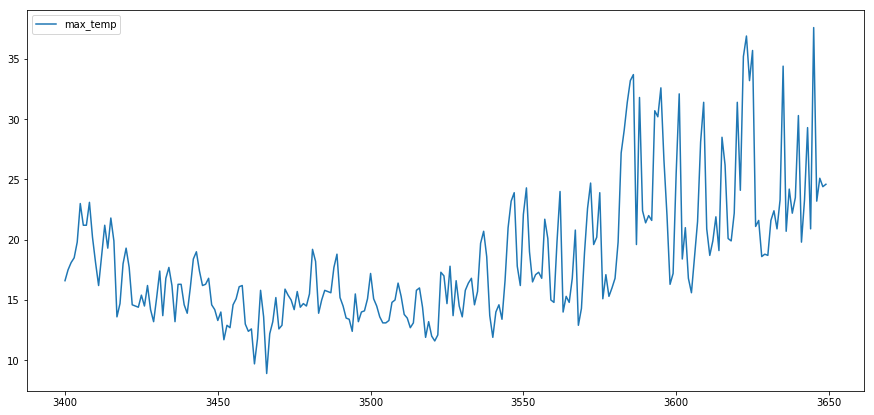

In [4]:
df.plot(figsize=(15,7))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 3400 to 3649
Data columns (total 2 columns):
date        250 non-null object
max_temp    250 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [6]:
df.set_index(['date'],inplace=True)

raw_dataa=df.values
raw_dataa=raw_dataa.astype('float32')



scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(raw_dataa)


In [7]:
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 150
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]    
 

In [8]:
n_batch=1
model = Sequential()
model.add(LSTM(50, batch_input_shape=(1,None,1),return_sequences=True,stateful= True))
model.add(LSTM(50, return_sequences=True,stateful= True))
model.add(LSTM(50, return_sequences=True,stateful= True))
model.add(LSTM(50,return_sequences=False, stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

for i in range(5):
    model.fit(Xtrain,Ytrain,epochs=100,verbose=1,batch_size=n_batch) 
    model.reset_states()
    

Epoch 1/100
150/150 [==============================] - 15s 102ms/step - loss: 0.0518
Epoch 2/100
150/150 [==============================] - 12s 83ms/step - loss: 0.0452
Epoch 3/100
150/150 [==============================] - 12s 80ms/step - loss: 0.0403
Epoch 4/100
150/150 [==============================] - 12s 80ms/step - loss: 0.0400
Epoch 5/100
150/150 [==============================] - 12s 80ms/step - loss: 0.0427
Epoch 6/100
150/150 [==============================] - 12s 80ms/step - loss: 0.0408
Epoch 7/100
150/150 [==============================] - 12s 79ms/step - loss: 0.0408
Epoch 8/100
150/150 [==============================] - 12s 79ms/step - loss: 0.0371
Epoch 9/100
150/150 [==============================] - 12s 79ms/step - loss: 0.0383
Epoch 10/100
150/150 [==============================] - 12s 79ms/step - loss: 0.0406
Epoch 11/100
150/150 [==============================] - 12s 79ms/step - loss: 0.0373
Epoch 12/100
150/150 [==============================] - 12s 79ms/step - l

150/150 [==============================] - 11s 76ms/step - loss: 0.0134
Epoch 98/100
150/150 [==============================] - 11s 75ms/step - loss: 0.0153
Epoch 99/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0149
Epoch 100/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0150
Epoch 1/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0133
Epoch 2/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0129
Epoch 3/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0130
Epoch 4/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0126
Epoch 5/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0136
Epoch 6/100
150/150 [==============================] - 11s 75ms/step - loss: 0.0170
Epoch 7/100
150/150 [==============================] - 12s 77ms/step - loss: 0.0159
Epoch 8/100
150/150 [==============================] - 12s 77ms/step - loss: 0.0138


150/150 [==============================] - 11s 76ms/step - loss: 0.0020
Epoch 94/100
150/150 [==============================] - 12s 77ms/step - loss: 0.0023
Epoch 95/100
150/150 [==============================] - 11s 73ms/step - loss: 0.0032
Epoch 96/100
150/150 [==============================] - 11s 73ms/step - loss: 0.0029
Epoch 97/100
150/150 [==============================] - 11s 73ms/step - loss: 0.0022
Epoch 98/100
150/150 [==============================] - 11s 72ms/step - loss: 0.0015
Epoch 99/100
150/150 [==============================] - 11s 72ms/step - loss: 0.0013
Epoch 100/100
150/150 [==============================] - 11s 74ms/step - loss: 0.0013
Epoch 1/100
150/150 [==============================] - 12s 78ms/step - loss: 0.0013
Epoch 2/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0013
Epoch 3/100
150/150 [==============================] - 12s 77ms/step - loss: 0.0011
Epoch 4/100
150/150 [==============================] - 11s 76ms/step - loss: 0.0

150/150 [==============================] - 10s 67ms/step - loss: 2.1805e-04
Epoch 88/100
150/150 [==============================] - 10s 68ms/step - loss: 4.5795e-04
Epoch 89/100
150/150 [==============================] - 10s 67ms/step - loss: 6.0580e-04
Epoch 90/100
150/150 [==============================] - 10s 65ms/step - loss: 0.0020
Epoch 91/100
150/150 [==============================] - 9s 62ms/step - loss: 0.0013
Epoch 92/100
150/150 [==============================] - 9s 63ms/step - loss: 7.2951e-04
Epoch 93/100
150/150 [==============================] - 9s 63ms/step - loss: 4.8609e-04
Epoch 94/100
150/150 [==============================] - 9s 62ms/step - loss: 3.3563e-04
Epoch 95/100
150/150 [==============================] - 9s 61ms/step - loss: 2.1588e-04
Epoch 96/100
150/150 [==============================] - 9s 62ms/step - loss: 2.1223e-04
Epoch 97/100
150/150 [==============================] - 9s 61ms/step - loss: 1.8889e-04
Epoch 98/100
150/150 [===========================

150/150 [==============================] - 11s 70ms/step - loss: 2.1710e-04
Epoch 81/100
150/150 [==============================] - 11s 73ms/step - loss: 2.7619e-04
Epoch 82/100
150/150 [==============================] - 11s 71ms/step - loss: 2.6285e-04
Epoch 83/100
150/150 [==============================] - 11s 75ms/step - loss: 3.0992e-04
Epoch 84/100
150/150 [==============================] - 11s 72ms/step - loss: 0.0012
Epoch 85/100
150/150 [==============================] - 11s 73ms/step - loss: 7.7093e-04
Epoch 86/100
150/150 [==============================] - 11s 74ms/step - loss: 0.0012
Epoch 87/100
150/150 [==============================] - 11s 72ms/step - loss: 0.0014
Epoch 88/100
150/150 [==============================] - 11s 73ms/step - loss: 3.2106e-04
Epoch 89/100
150/150 [==============================] - 11s 73ms/step - loss: 1.3289e-04
Epoch 90/100
150/150 [==============================] - 10s 64ms/step - loss: 5.7468e-05
Epoch 91/100
150/150 [========================

150/150 [==============================] - 10s 68ms/step - loss: 8.4130e-05
Epoch 73/100
150/150 [==============================] - 10s 67ms/step - loss: 7.5734e-05
Epoch 74/100
150/150 [==============================] - 10s 68ms/step - loss: 1.0784e-04
Epoch 75/100
150/150 [==============================] - 10s 67ms/step - loss: 1.5430e-04
Epoch 76/100
150/150 [==============================] - 10s 67ms/step - loss: 3.1022e-04
Epoch 77/100
150/150 [==============================] - 10s 68ms/step - loss: 5.1057e-04
Epoch 78/100
150/150 [==============================] - 10s 67ms/step - loss: 0.0019
Epoch 79/100
150/150 [==============================] - 10s 68ms/step - loss: 0.0046
Epoch 80/100
150/150 [==============================] - 10s 66ms/step - loss: 0.0047
Epoch 81/100
150/150 [==============================] - 10s 66ms/step - loss: 4.2334e-04
Epoch 82/100
150/150 [==============================] - 10s 70ms/step - loss: 1.8342e-04
Epoch 83/100
150/150 [========================

In [9]:
predictions= model.predict(Xtrain, batch_size=n_batch)

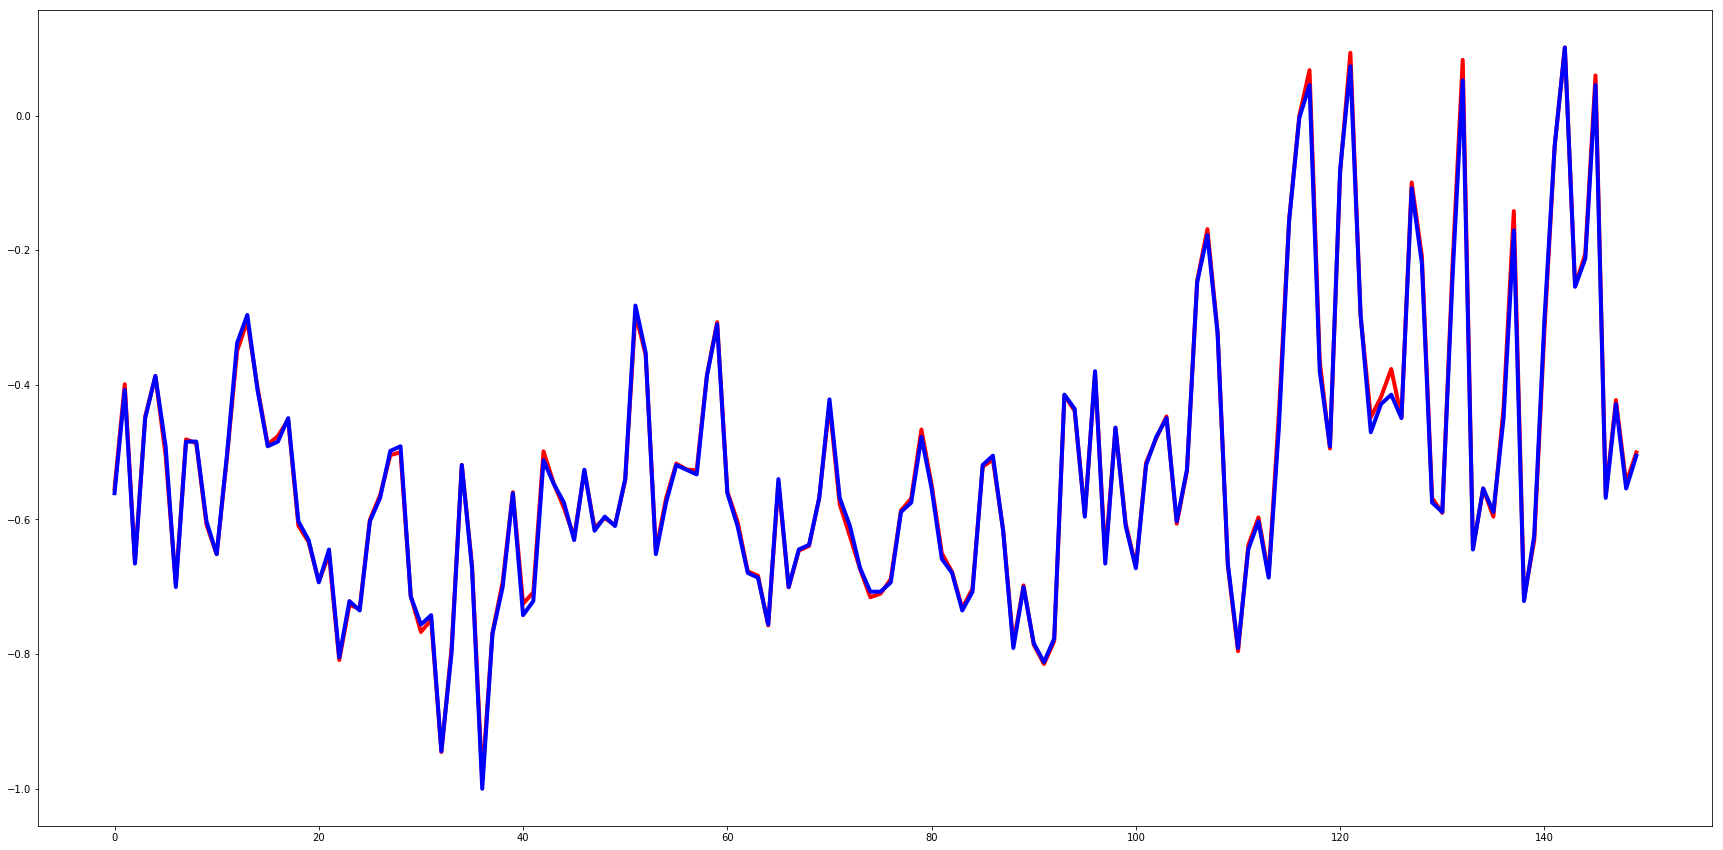

In [10]:
plt.figure(figsize=(30,15))
plt.plot(predictions, 'r', linewidth=4)
plt.plot(Ytrain, 'b', linewidth=4)
plt.show()

In [11]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  
model.reset_states()

In [12]:
preds = model.predict(Xtest,batch_size=n_batch)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

78.50879

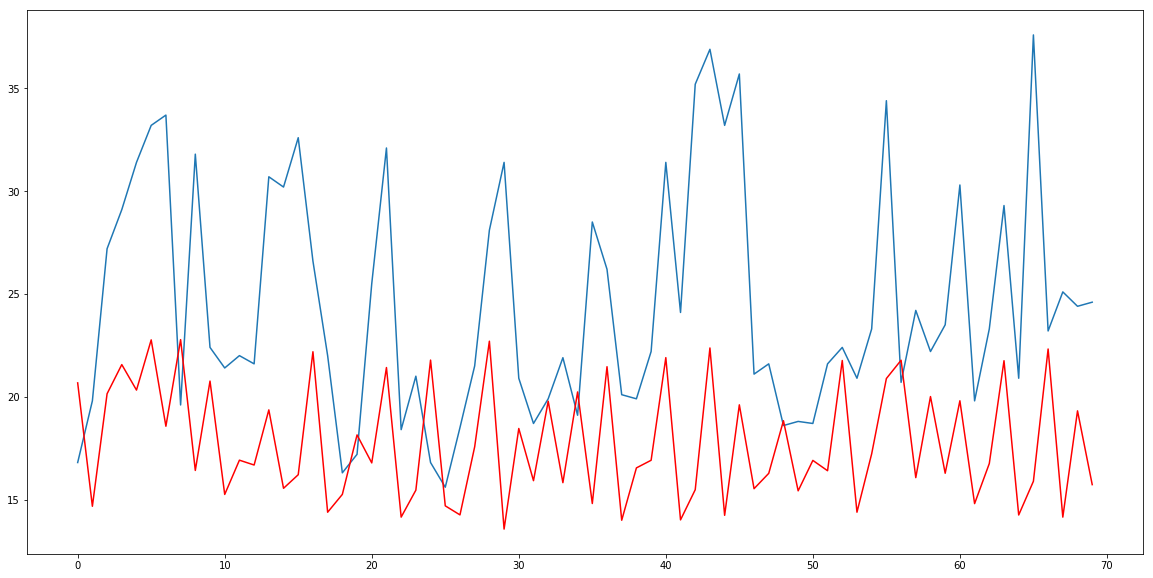

In [13]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()


In [14]:
def insert_end(Xin,new_input):
    print ('Before: \n', Xin , new_input )
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    print ('After :\n', Xin)
    return Xin

In [15]:
Xtrain

array([[[-0.46341455],
        [-0.40069675],
        [-0.35888493],
        ...,
        [-0.49128902],
        [-0.6306619 ],
        [-0.7003483 ]],

       [[-0.40069675],
        [-0.35888493],
        [-0.33101034],
        ...,
        [-0.6306619 ],
        [-0.7003483 ],
        [-0.56097555]],

       [[-0.35888493],
        [-0.33101034],
        [-0.24041808],
        ...,
        [-0.7003483 ],
        [-0.56097555],
        [-0.40766537]],

       ...,

       [[ 0.04529631],
        [-0.3797909 ],
        [-0.49128902],
        ...,
        [-0.21254337],
        [ 0.04529631],
        [-0.56794417]],

       [[-0.3797909 ],
        [-0.49128902],
        [-0.08013928],
        ...,
        [ 0.04529631],
        [-0.56794417],
        [-0.42857134]],

       [[-0.49128902],
        [-0.08013928],
        [ 0.07317078],
        ...,
        [-0.56794417],
        [-0.42857134],
        [-0.5540068 ]]], dtype=float32)

In [16]:
#forecasting for future

beg=0
forcasted_output = []
model.reset_states()

Xin = Xtrain[beg:beg+1,:,:]
for i in range(250):
    
    out = model.predict(Xin, batch_size=1)    
    forcasted_output.append(out[0,0])
    Xin = insert_end(Xin,out[0,0])

model.reset_states()

Before: 
 [[[-0.46341455]
  [-0.40069675]
  [-0.35888493]
  [-0.33101034]
  [-0.24041808]
  [-0.01742148]
  [-0.14285696]
  [-0.14285696]
  [-0.01045287]
  [-0.21254337]
  [-0.35888493]
  [-0.49128902]
  [-0.317073  ]
  [-0.14285696]
  [-0.27526128]
  [-0.10104525]
  [-0.23344934]
  [-0.6724737 ]
  [-0.59581876]
  [-0.36585355]
  [-0.27526128]
  [-0.3867594 ]
  [-0.6027874 ]
  [-0.609756  ]
  [-0.6167246 ]
  [-0.5470382 ]
  [-0.609756  ]
  [-0.49128902]
  [-0.6306619 ]
  [-0.7003483 ]]] -0.55436236
After :
 [[[-0.40069675]
  [-0.35888493]
  [-0.33101034]
  [-0.24041808]
  [-0.01742148]
  [-0.14285696]
  [-0.14285696]
  [-0.01045287]
  [-0.21254337]
  [-0.35888493]
  [-0.49128902]
  [-0.317073  ]
  [-0.14285696]
  [-0.27526128]
  [-0.10104525]
  [-0.23344934]
  [-0.6724737 ]
  [-0.59581876]
  [-0.36585355]
  [-0.27526128]
  [-0.3867594 ]
  [-0.6027874 ]
  [-0.609756  ]
  [-0.6167246 ]
  [-0.5470382 ]
  [-0.609756  ]
  [-0.49128902]
  [-0.6306619 ]
  [-0.7003483 ]
  [-0.55436236]]]
Befor

Before: 
 [[[-0.27526128]
  [-0.10104525]
  [-0.23344934]
  [-0.6724737 ]
  [-0.59581876]
  [-0.36585355]
  [-0.27526128]
  [-0.3867594 ]
  [-0.6027874 ]
  [-0.609756  ]
  [-0.6167246 ]
  [-0.5470382 ]
  [-0.609756  ]
  [-0.49128902]
  [-0.6306619 ]
  [-0.7003483 ]
  [-0.55436236]
  [-0.39842898]
  [-0.664916  ]
  [-0.448552  ]
  [-0.38667998]
  [-0.50586563]
  [-0.6978216 ]
  [-0.4826193 ]
  [-0.48934457]
  [-0.609195  ]
  [-0.64860475]
  [-0.50504494]
  [-0.35061646]
  [-0.31487226]]] -0.4089557
After :
 [[[-0.10104525]
  [-0.23344934]
  [-0.6724737 ]
  [-0.59581876]
  [-0.36585355]
  [-0.27526128]
  [-0.3867594 ]
  [-0.6027874 ]
  [-0.609756  ]
  [-0.6167246 ]
  [-0.5470382 ]
  [-0.609756  ]
  [-0.49128902]
  [-0.6306619 ]
  [-0.7003483 ]
  [-0.55436236]
  [-0.39842898]
  [-0.664916  ]
  [-0.448552  ]
  [-0.38667998]
  [-0.50586563]
  [-0.6978216 ]
  [-0.4826193 ]
  [-0.48934457]
  [-0.609195  ]
  [-0.64860475]
  [-0.50504494]
  [-0.35061646]
  [-0.31487226]
  [-0.4089557 ]]]
Before

Before: 
 [[[-0.49128902]
  [-0.6306619 ]
  [-0.7003483 ]
  [-0.55436236]
  [-0.39842898]
  [-0.664916  ]
  [-0.448552  ]
  [-0.38667998]
  [-0.50586563]
  [-0.6978216 ]
  [-0.4826193 ]
  [-0.48934457]
  [-0.609195  ]
  [-0.64860475]
  [-0.50504494]
  [-0.35061646]
  [-0.31487226]
  [-0.4089557 ]
  [-0.4819975 ]
  [-0.47257757]
  [-0.4576126 ]
  [-0.6147994 ]
  [-0.639397  ]
  [-0.6912302 ]
  [-0.6607237 ]
  [-0.80699193]
  [-0.7328813 ]
  [-0.7311888 ]
  [-0.5997983 ]
  [-0.5585274 ]]] -0.50247216
After :
 [[[-0.6306619 ]
  [-0.7003483 ]
  [-0.55436236]
  [-0.39842898]
  [-0.664916  ]
  [-0.448552  ]
  [-0.38667998]
  [-0.50586563]
  [-0.6978216 ]
  [-0.4826193 ]
  [-0.48934457]
  [-0.609195  ]
  [-0.64860475]
  [-0.50504494]
  [-0.35061646]
  [-0.31487226]
  [-0.4089557 ]
  [-0.4819975 ]
  [-0.47257757]
  [-0.4576126 ]
  [-0.6147994 ]
  [-0.639397  ]
  [-0.6912302 ]
  [-0.6607237 ]
  [-0.80699193]
  [-0.7328813 ]
  [-0.7311888 ]
  [-0.5997983 ]
  [-0.5585274 ]
  [-0.50247216]]]
Befor

Before: 
 [[[-0.50504494]
  [-0.35061646]
  [-0.31487226]
  [-0.4089557 ]
  [-0.4819975 ]
  [-0.47257757]
  [-0.4576126 ]
  [-0.6147994 ]
  [-0.639397  ]
  [-0.6912302 ]
  [-0.6607237 ]
  [-0.80699193]
  [-0.7328813 ]
  [-0.7311888 ]
  [-0.5997983 ]
  [-0.5585274 ]
  [-0.50247216]
  [-0.50461924]
  [-0.71842515]
  [-0.7707399 ]
  [-0.75494707]
  [-0.9465281 ]
  [-0.7849952 ]
  [-0.5217869 ]
  [-0.6751271 ]
  [-0.980813  ]
  [-0.76324975]
  [-0.693993  ]
  [-0.56086326]
  [-0.71909714]]] -0.7043154
After :
 [[[-0.35061646]
  [-0.31487226]
  [-0.4089557 ]
  [-0.4819975 ]
  [-0.47257757]
  [-0.4576126 ]
  [-0.6147994 ]
  [-0.639397  ]
  [-0.6912302 ]
  [-0.6607237 ]
  [-0.80699193]
  [-0.7328813 ]
  [-0.7311888 ]
  [-0.5997983 ]
  [-0.5585274 ]
  [-0.50247216]
  [-0.50461924]
  [-0.71842515]
  [-0.7707399 ]
  [-0.75494707]
  [-0.9465281 ]
  [-0.7849952 ]
  [-0.5217869 ]
  [-0.6751271 ]
  [-0.980813  ]
  [-0.76324975]
  [-0.693993  ]
  [-0.56086326]
  [-0.71909714]
  [-0.7043154 ]]]
Before

Before: 
 [[[-0.5585274 ]
  [-0.50247216]
  [-0.50461924]
  [-0.71842515]
  [-0.7707399 ]
  [-0.75494707]
  [-0.9465281 ]
  [-0.7849952 ]
  [-0.5217869 ]
  [-0.6751271 ]
  [-0.980813  ]
  [-0.76324975]
  [-0.693993  ]
  [-0.56086326]
  [-0.71909714]
  [-0.7043154 ]
  [-0.495443  ]
  [-0.54702246]
  [-0.5844951 ]
  [-0.625438  ]
  [-0.5372293 ]
  [-0.61492133]
  [-0.5985412 ]
  [-0.6005511 ]
  [-0.5278866 ]
  [-0.29729995]
  [-0.36945182]
  [-0.6330174 ]
  [-0.5724751 ]
  [-0.5257712 ]]] -0.53539103
After :
 [[[-0.50247216]
  [-0.50461924]
  [-0.71842515]
  [-0.7707399 ]
  [-0.75494707]
  [-0.9465281 ]
  [-0.7849952 ]
  [-0.5217869 ]
  [-0.6751271 ]
  [-0.980813  ]
  [-0.76324975]
  [-0.693993  ]
  [-0.56086326]
  [-0.71909714]
  [-0.7043154 ]
  [-0.495443  ]
  [-0.54702246]
  [-0.5844951 ]
  [-0.625438  ]
  [-0.5372293 ]
  [-0.61492133]
  [-0.5985412 ]
  [-0.6005511 ]
  [-0.5278866 ]
  [-0.29729995]
  [-0.36945182]
  [-0.6330174 ]
  [-0.5724751 ]
  [-0.5257712 ]
  [-0.53539103]]]
Befor

After :
 [[[-0.71909714]
  [-0.7043154 ]
  [-0.495443  ]
  [-0.54702246]
  [-0.5844951 ]
  [-0.625438  ]
  [-0.5372293 ]
  [-0.61492133]
  [-0.5985412 ]
  [-0.6005511 ]
  [-0.5278866 ]
  [-0.29729995]
  [-0.36945182]
  [-0.6330174 ]
  [-0.5724751 ]
  [-0.5257712 ]
  [-0.53539103]
  [-0.5301032 ]
  [-0.38001156]
  [-0.31597173]
  [-0.56548923]
  [-0.60469174]
  [-0.67804325]
  [-0.6823946 ]
  [-0.7584841 ]
  [-0.54586065]
  [-0.70319575]
  [-0.64471745]
  [-0.6388216 ]
  [-0.5657799 ]]]
Before: 
 [[[-0.71909714]
  [-0.7043154 ]
  [-0.495443  ]
  [-0.54702246]
  [-0.5844951 ]
  [-0.625438  ]
  [-0.5372293 ]
  [-0.61492133]
  [-0.5985412 ]
  [-0.6005511 ]
  [-0.5278866 ]
  [-0.29729995]
  [-0.36945182]
  [-0.6330174 ]
  [-0.5724751 ]
  [-0.5257712 ]
  [-0.53539103]
  [-0.5301032 ]
  [-0.38001156]
  [-0.31597173]
  [-0.56548923]
  [-0.60469174]
  [-0.67804325]
  [-0.6823946 ]
  [-0.7584841 ]
  [-0.54586065]
  [-0.70319575]
  [-0.64471745]
  [-0.6388216 ]
  [-0.5657799 ]]] -0.4275741
After 

After :
 [[[-0.6330174 ]
  [-0.5724751 ]
  [-0.5257712 ]
  [-0.53539103]
  [-0.5301032 ]
  [-0.38001156]
  [-0.31597173]
  [-0.56548923]
  [-0.60469174]
  [-0.67804325]
  [-0.6823946 ]
  [-0.7584841 ]
  [-0.54586065]
  [-0.70319575]
  [-0.64471745]
  [-0.6388216 ]
  [-0.5657799 ]
  [-0.4275741 ]
  [-0.580081  ]
  [-0.62648463]
  [-0.6757728 ]
  [-0.72483456]
  [-0.7141058 ]
  [-0.68395746]
  [-0.5819512 ]
  [-0.5726137 ]
  [-0.47494456]
  [-0.55147934]
  [-0.6437638 ]
  [-0.6713438 ]]]
Before: 
 [[[-0.6330174 ]
  [-0.5724751 ]
  [-0.5257712 ]
  [-0.53539103]
  [-0.5301032 ]
  [-0.38001156]
  [-0.31597173]
  [-0.56548923]
  [-0.60469174]
  [-0.67804325]
  [-0.6823946 ]
  [-0.7584841 ]
  [-0.54586065]
  [-0.70319575]
  [-0.64471745]
  [-0.6388216 ]
  [-0.5657799 ]
  [-0.4275741 ]
  [-0.580081  ]
  [-0.62648463]
  [-0.6757728 ]
  [-0.72483456]
  [-0.7141058 ]
  [-0.68395746]
  [-0.5819512 ]
  [-0.5726137 ]
  [-0.47494456]
  [-0.55147934]
  [-0.6437638 ]
  [-0.6713438 ]]] -0.725615
After :

Before: 
 [[[-0.54586065]
  [-0.70319575]
  [-0.64471745]
  [-0.6388216 ]
  [-0.5657799 ]
  [-0.4275741 ]
  [-0.580081  ]
  [-0.62648463]
  [-0.6757728 ]
  [-0.72483456]
  [-0.7141058 ]
  [-0.68395746]
  [-0.5819512 ]
  [-0.5726137 ]
  [-0.47494456]
  [-0.55147934]
  [-0.6437638 ]
  [-0.6713438 ]
  [-0.725615  ]
  [-0.68772715]
  [-0.5186802 ]
  [-0.51151276]
  [-0.6023561 ]
  [-0.7589983 ]
  [-0.69276464]
  [-0.776827  ]
  [-0.81374717]
  [-0.7846837 ]
  [-0.41818762]
  [-0.4408459 ]]] -0.5999969
After :
 [[[-0.70319575]
  [-0.64471745]
  [-0.6388216 ]
  [-0.5657799 ]
  [-0.4275741 ]
  [-0.580081  ]
  [-0.62648463]
  [-0.6757728 ]
  [-0.72483456]
  [-0.7141058 ]
  [-0.68395746]
  [-0.5819512 ]
  [-0.5726137 ]
  [-0.47494456]
  [-0.55147934]
  [-0.6437638 ]
  [-0.6713438 ]
  [-0.725615  ]
  [-0.68772715]
  [-0.5186802 ]
  [-0.51151276]
  [-0.6023561 ]
  [-0.7589983 ]
  [-0.69276464]
  [-0.776827  ]
  [-0.81374717]
  [-0.7846837 ]
  [-0.41818762]
  [-0.4408459 ]
  [-0.5999969 ]]]
Before

Before: 
 [[[-0.5819512 ]
  [-0.5726137 ]
  [-0.47494456]
  [-0.55147934]
  [-0.6437638 ]
  [-0.6713438 ]
  [-0.725615  ]
  [-0.68772715]
  [-0.5186802 ]
  [-0.51151276]
  [-0.6023561 ]
  [-0.7589983 ]
  [-0.69276464]
  [-0.776827  ]
  [-0.81374717]
  [-0.7846837 ]
  [-0.41818762]
  [-0.4408459 ]
  [-0.5999969 ]
  [-0.38273638]
  [-0.6545427 ]
  [-0.46296   ]
  [-0.60569584]
  [-0.66890836]
  [-0.5184162 ]
  [-0.48203832]
  [-0.4540053 ]
  [-0.6050446 ]
  [-0.5310433 ]
  [-0.2494139 ]]] -0.16943276
After :
 [[[-0.5726137 ]
  [-0.47494456]
  [-0.55147934]
  [-0.6437638 ]
  [-0.6713438 ]
  [-0.725615  ]
  [-0.68772715]
  [-0.5186802 ]
  [-0.51151276]
  [-0.6023561 ]
  [-0.7589983 ]
  [-0.69276464]
  [-0.776827  ]
  [-0.81374717]
  [-0.7846837 ]
  [-0.41818762]
  [-0.4408459 ]
  [-0.5999969 ]
  [-0.38273638]
  [-0.6545427 ]
  [-0.46296   ]
  [-0.60569584]
  [-0.66890836]
  [-0.5184162 ]
  [-0.48203832]
  [-0.4540053 ]
  [-0.6050446 ]
  [-0.5310433 ]
  [-0.2494139 ]
  [-0.16943276]]]
Befor

After :
 [[[-0.776827  ]
  [-0.81374717]
  [-0.7846837 ]
  [-0.41818762]
  [-0.4408459 ]
  [-0.5999969 ]
  [-0.38273638]
  [-0.6545427 ]
  [-0.46296   ]
  [-0.60569584]
  [-0.66890836]
  [-0.5184162 ]
  [-0.48203832]
  [-0.4540053 ]
  [-0.6050446 ]
  [-0.5310433 ]
  [-0.2494139 ]
  [-0.16943276]
  [-0.31369588]
  [-0.6640099 ]
  [-0.7984396 ]
  [-0.64116025]
  [-0.5953548 ]
  [-0.6848774 ]
  [-0.4442601 ]
  [-0.15180025]
  [-0.00384331]
  [ 0.06959936]
  [-0.36379853]
  [-0.49607128]]]
Before: 
 [[[-0.776827  ]
  [-0.81374717]
  [-0.7846837 ]
  [-0.41818762]
  [-0.4408459 ]
  [-0.5999969 ]
  [-0.38273638]
  [-0.6545427 ]
  [-0.46296   ]
  [-0.60569584]
  [-0.66890836]
  [-0.5184162 ]
  [-0.48203832]
  [-0.4540053 ]
  [-0.6050446 ]
  [-0.5310433 ]
  [-0.2494139 ]
  [-0.16943276]
  [-0.31369588]
  [-0.6640099 ]
  [-0.7984396 ]
  [-0.64116025]
  [-0.5953548 ]
  [-0.6848774 ]
  [-0.4442601 ]
  [-0.15180025]
  [-0.00384331]
  [ 0.06959936]
  [-0.36379853]
  [-0.49607128]]] -0.083070606
Afte

  [ 0.08874863]]]
Before: 
 [[[-0.4540053 ]
  [-0.6050446 ]
  [-0.5310433 ]
  [-0.2494139 ]
  [-0.16943276]
  [-0.31369588]
  [-0.6640099 ]
  [-0.7984396 ]
  [-0.64116025]
  [-0.5953548 ]
  [-0.6848774 ]
  [-0.4442601 ]
  [-0.15180025]
  [-0.00384331]
  [ 0.06959936]
  [-0.36379853]
  [-0.49607128]
  [-0.08307061]
  [ 0.09617493]
  [-0.29766595]
  [-0.44511425]
  [-0.42413557]
  [-0.38850313]
  [-0.4028093 ]
  [-0.12027323]
  [-0.21632281]
  [-0.5680146 ]
  [-0.5944737 ]
  [-0.22045447]
  [ 0.08874863]]] -0.64160776
After :
 [[[-0.6050446 ]
  [-0.5310433 ]
  [-0.2494139 ]
  [-0.16943276]
  [-0.31369588]
  [-0.6640099 ]
  [-0.7984396 ]
  [-0.64116025]
  [-0.5953548 ]
  [-0.6848774 ]
  [-0.4442601 ]
  [-0.15180025]
  [-0.00384331]
  [ 0.06959936]
  [-0.36379853]
  [-0.49607128]
  [-0.08307061]
  [ 0.09617493]
  [-0.29766595]
  [-0.44511425]
  [-0.42413557]
  [-0.38850313]
  [-0.4028093 ]
  [-0.12027323]
  [-0.21632281]
  [-0.5680146 ]
  [-0.5944737 ]
  [-0.22045447]
  [ 0.08874863]
  [-0

Before: 
 [[[-0.15180025]
  [-0.00384331]
  [ 0.06959936]
  [-0.36379853]
  [-0.49607128]
  [-0.08307061]
  [ 0.09617493]
  [-0.29766595]
  [-0.44511425]
  [-0.42413557]
  [-0.38850313]
  [-0.4028093 ]
  [-0.12027323]
  [-0.21632281]
  [-0.5680146 ]
  [-0.5944737 ]
  [-0.22045447]
  [ 0.08874863]
  [-0.64160776]
  [-0.55869216]
  [-0.6049751 ]
  [-0.42519578]
  [-0.13016202]
  [-0.71198905]
  [-0.6316143 ]
  [-0.32647517]
  [-0.04944608]
  [ 0.10082576]
  [-0.25395694]
  [-0.20834506]]] 0.058785677
After :
 [[[-0.00384331]
  [ 0.06959936]
  [-0.36379853]
  [-0.49607128]
  [-0.08307061]
  [ 0.09617493]
  [-0.29766595]
  [-0.44511425]
  [-0.42413557]
  [-0.38850313]
  [-0.4028093 ]
  [-0.12027323]
  [-0.21632281]
  [-0.5680146 ]
  [-0.5944737 ]
  [-0.22045447]
  [ 0.08874863]
  [-0.64160776]
  [-0.55869216]
  [-0.6049751 ]
  [-0.42519578]
  [-0.13016202]
  [-0.71198905]
  [-0.6316143 ]
  [-0.32647517]
  [-0.04944608]
  [ 0.10082576]
  [-0.25395694]
  [-0.20834506]
  [ 0.05878568]]]
Befor

Before: 
 [[[-0.12027323]
  [-0.21632281]
  [-0.5680146 ]
  [-0.5944737 ]
  [-0.22045447]
  [ 0.08874863]
  [-0.64160776]
  [-0.55869216]
  [-0.6049751 ]
  [-0.42519578]
  [-0.13016202]
  [-0.71198905]
  [-0.6316143 ]
  [-0.32647517]
  [-0.04944608]
  [ 0.10082576]
  [-0.25395694]
  [-0.20834506]
  [ 0.05878568]
  [-0.5652497 ]
  [-0.42391592]
  [-0.5490316 ]
  [-0.49627984]
  [-0.17798784]
  [-0.315553  ]
  [-0.6083169 ]
  [-0.46954894]
  [-0.21675754]
  [ 0.08465275]
  [-0.33287263]]] -0.25896597
After :
 [[[-0.21632281]
  [-0.5680146 ]
  [-0.5944737 ]
  [-0.22045447]
  [ 0.08874863]
  [-0.64160776]
  [-0.55869216]
  [-0.6049751 ]
  [-0.42519578]
  [-0.13016202]
  [-0.71198905]
  [-0.6316143 ]
  [-0.32647517]
  [-0.04944608]
  [ 0.10082576]
  [-0.25395694]
  [-0.20834506]
  [ 0.05878568]
  [-0.5652497 ]
  [-0.42391592]
  [-0.5490316 ]
  [-0.49627984]
  [-0.17798784]
  [-0.315553  ]
  [-0.6083169 ]
  [-0.46954894]
  [-0.21675754]
  [ 0.08465275]
  [-0.33287263]
  [-0.25896597]]]
Befor

  [-0.21368957]]]
Before: 
 [[[-0.04944608]
  [ 0.10082576]
  [-0.25395694]
  [-0.20834506]
  [ 0.05878568]
  [-0.5652497 ]
  [-0.42391592]
  [-0.5490316 ]
  [-0.49627984]
  [-0.17798784]
  [-0.315553  ]
  [-0.6083169 ]
  [-0.46954894]
  [-0.21675754]
  [ 0.08465275]
  [-0.33287263]
  [-0.25896597]
  [ 0.04551625]
  [-0.5754088 ]
  [-0.4530728 ]
  [-0.5553073 ]
  [-0.48301512]
  [-0.1709457 ]
  [-0.5641725 ]
  [-0.59319764]
  [-0.2642794 ]
  [-0.14372039]
  [ 0.10539088]
  [-0.2941524 ]
  [-0.21368957]]] 0.06546268
After :
 [[[ 0.10082576]
  [-0.25395694]
  [-0.20834506]
  [ 0.05878568]
  [-0.5652497 ]
  [-0.42391592]
  [-0.5490316 ]
  [-0.49627984]
  [-0.17798784]
  [-0.315553  ]
  [-0.6083169 ]
  [-0.46954894]
  [-0.21675754]
  [ 0.08465275]
  [-0.33287263]
  [-0.25896597]
  [ 0.04551625]
  [-0.5754088 ]
  [-0.4530728 ]
  [-0.5553073 ]
  [-0.48301512]
  [-0.1709457 ]
  [-0.5641725 ]
  [-0.59319764]
  [-0.2642794 ]
  [-0.14372039]
  [ 0.10539088]
  [-0.2941524 ]
  [-0.21368957]
  [ 0.

Before: 
 [[[-0.46954894]
  [-0.21675754]
  [ 0.08465275]
  [-0.33287263]
  [-0.25896597]
  [ 0.04551625]
  [-0.5754088 ]
  [-0.4530728 ]
  [-0.5553073 ]
  [-0.48301512]
  [-0.1709457 ]
  [-0.5641725 ]
  [-0.59319764]
  [-0.2642794 ]
  [-0.14372039]
  [ 0.10539088]
  [-0.2941524 ]
  [-0.21368957]
  [ 0.06546268]
  [-0.5600466 ]
  [-0.43475258]
  [-0.5430462 ]
  [-0.4974352 ]
  [-0.16239396]
  [-0.28199148]
  [-0.6042546 ]
  [-0.48763067]
  [-0.21481732]
  [ 0.09326062]
  [-0.40253294]]] -0.2981187
After :
 [[[-0.21675754]
  [ 0.08465275]
  [-0.33287263]
  [-0.25896597]
  [ 0.04551625]
  [-0.5754088 ]
  [-0.4530728 ]
  [-0.5553073 ]
  [-0.48301512]
  [-0.1709457 ]
  [-0.5641725 ]
  [-0.59319764]
  [-0.2642794 ]
  [-0.14372039]
  [ 0.10539088]
  [-0.2941524 ]
  [-0.21368957]
  [ 0.06546268]
  [-0.5600466 ]
  [-0.43475258]
  [-0.5430462 ]
  [-0.4974352 ]
  [-0.16239396]
  [-0.28199148]
  [-0.6042546 ]
  [-0.48763067]
  [-0.21481732]
  [ 0.09326062]
  [-0.40253294]
  [-0.2981187 ]]]
Before

Before: 
 [[[-0.14372039]
  [ 0.10539088]
  [-0.2941524 ]
  [-0.21368957]
  [ 0.06546268]
  [-0.5600466 ]
  [-0.43475258]
  [-0.5430462 ]
  [-0.4974352 ]
  [-0.16239396]
  [-0.28199148]
  [-0.6042546 ]
  [-0.48763067]
  [-0.21481732]
  [ 0.09326062]
  [-0.40253294]
  [-0.2981187 ]
  [ 0.00424448]
  [-0.5768276 ]
  [-0.45425534]
  [-0.5496741 ]
  [-0.49982178]
  [-0.1867219 ]
  [-0.5209125 ]
  [-0.60576886]
  [-0.28339264]
  [-0.07949015]
  [ 0.11590266]
  [-0.2931359 ]
  [-0.2034668 ]]] 0.064542025
After :
 [[[ 0.10539088]
  [-0.2941524 ]
  [-0.21368957]
  [ 0.06546268]
  [-0.5600466 ]
  [-0.43475258]
  [-0.5430462 ]
  [-0.4974352 ]
  [-0.16239396]
  [-0.28199148]
  [-0.6042546 ]
  [-0.48763067]
  [-0.21481732]
  [ 0.09326062]
  [-0.40253294]
  [-0.2981187 ]
  [ 0.00424448]
  [-0.5768276 ]
  [-0.45425534]
  [-0.5496741 ]
  [-0.49982178]
  [-0.1867219 ]
  [-0.5209125 ]
  [-0.60576886]
  [-0.28339264]
  [-0.07949015]
  [ 0.11590266]
  [-0.2931359 ]
  [-0.2034668 ]
  [ 0.06454203]]]
Befor

  [-0.00134766]]]
Before: 
 [[[ 0.09326062]
  [-0.40253294]
  [-0.2981187 ]
  [ 0.00424448]
  [-0.5768276 ]
  [-0.45425534]
  [-0.5496741 ]
  [-0.49982178]
  [-0.1867219 ]
  [-0.5209125 ]
  [-0.60576886]
  [-0.28339264]
  [-0.07949015]
  [ 0.11590266]
  [-0.2931359 ]
  [-0.2034668 ]
  [ 0.06454203]
  [-0.5653207 ]
  [-0.43098164]
  [-0.5401499 ]
  [-0.5005464 ]
  [-0.1631344 ]
  [-0.27556297]
  [-0.60311854]
  [-0.4924843 ]
  [-0.21622944]
  [ 0.09200191]
  [-0.416373  ]
  [-0.30288863]
  [-0.00134766]]] -0.5774937
After :
 [[[-0.40253294]
  [-0.2981187 ]
  [ 0.00424448]
  [-0.5768276 ]
  [-0.45425534]
  [-0.5496741 ]
  [-0.49982178]
  [-0.1867219 ]
  [-0.5209125 ]
  [-0.60576886]
  [-0.28339264]
  [-0.07949015]
  [ 0.11590266]
  [-0.2931359 ]
  [-0.2034668 ]
  [ 0.06454203]
  [-0.5653207 ]
  [-0.43098164]
  [-0.5401499 ]
  [-0.5005464 ]
  [-0.1631344 ]
  [-0.27556297]
  [-0.60311854]
  [-0.4924843 ]
  [-0.21622944]
  [ 0.09200191]
  [-0.416373  ]
  [-0.30288863]
  [-0.00134766]
  [-0.

Before: 
 [[[-0.07949015]
  [ 0.11590266]
  [-0.2931359 ]
  [-0.2034668 ]
  [ 0.06454203]
  [-0.5653207 ]
  [-0.43098164]
  [-0.5401499 ]
  [-0.5005464 ]
  [-0.1631344 ]
  [-0.27556297]
  [-0.60311854]
  [-0.4924843 ]
  [-0.21622944]
  [ 0.09200191]
  [-0.416373  ]
  [-0.30288863]
  [-0.00134766]
  [-0.5774937 ]
  [-0.4549504 ]
  [-0.5464616 ]
  [-0.5025432 ]
  [-0.19033746]
  [-0.51705426]
  [-0.60582256]
  [-0.2819169 ]
  [-0.06779659]
  [ 0.1157676 ]
  [-0.29020095]
  [-0.20065355]]] 0.065208286
After :
 [[[ 0.11590266]
  [-0.2931359 ]
  [-0.2034668 ]
  [ 0.06454203]
  [-0.5653207 ]
  [-0.43098164]
  [-0.5401499 ]
  [-0.5005464 ]
  [-0.1631344 ]
  [-0.27556297]
  [-0.60311854]
  [-0.4924843 ]
  [-0.21622944]
  [ 0.09200191]
  [-0.416373  ]
  [-0.30288863]
  [-0.00134766]
  [-0.5774937 ]
  [-0.4549504 ]
  [-0.5464616 ]
  [-0.5025432 ]
  [-0.19033746]
  [-0.51705426]
  [-0.60582256]
  [-0.2819169 ]
  [-0.06779659]
  [ 0.1157676 ]
  [-0.29020095]
  [-0.20065355]
  [ 0.06520829]]]
Befor

  [-0.00181326]]]
Before: 
 [[[ 0.09200191]
  [-0.416373  ]
  [-0.30288863]
  [-0.00134766]
  [-0.5774937 ]
  [-0.4549504 ]
  [-0.5464616 ]
  [-0.5025432 ]
  [-0.19033746]
  [-0.51705426]
  [-0.60582256]
  [-0.2819169 ]
  [-0.06779659]
  [ 0.1157676 ]
  [-0.29020095]
  [-0.20065355]
  [ 0.06520829]
  [-0.5658709 ]
  [-0.43007523]
  [-0.53960514]
  [-0.50052005]
  [-0.16353463]
  [-0.27514002]
  [-0.60281944]
  [-0.4935609 ]
  [-0.21738659]
  [ 0.09120002]
  [-0.41806576]
  [-0.30371633]
  [-0.00181326]]] -0.5777153
After :
 [[[-0.416373  ]
  [-0.30288863]
  [-0.00134766]
  [-0.5774937 ]
  [-0.4549504 ]
  [-0.5464616 ]
  [-0.5025432 ]
  [-0.19033746]
  [-0.51705426]
  [-0.60582256]
  [-0.2819169 ]
  [-0.06779659]
  [ 0.1157676 ]
  [-0.29020095]
  [-0.20065355]
  [ 0.06520829]
  [-0.5658709 ]
  [-0.43007523]
  [-0.53960514]
  [-0.50052005]
  [-0.16353463]
  [-0.27514002]
  [-0.60281944]
  [-0.4935609 ]
  [-0.21738659]
  [ 0.09120002]
  [-0.41806576]
  [-0.30371633]
  [-0.00181326]
  [-0.

Before: 
 [[[-0.06779659]
  [ 0.1157676 ]
  [-0.29020095]
  [-0.20065355]
  [ 0.06520829]
  [-0.5658709 ]
  [-0.43007523]
  [-0.53960514]
  [-0.50052005]
  [-0.16353463]
  [-0.27514002]
  [-0.60281944]
  [-0.4935609 ]
  [-0.21738659]
  [ 0.09120002]
  [-0.41806576]
  [-0.30371633]
  [-0.00181326]
  [-0.5777153 ]
  [-0.4552123 ]
  [-0.546332  ]
  [-0.50246286]
  [-0.19058946]
  [-0.5226822 ]
  [-0.60562015]
  [-0.2793163 ]
  [-0.06767246]
  [ 0.11564758]
  [-0.28984624]
  [-0.20062506]]] 0.06518912
After :
 [[[ 0.1157676 ]
  [-0.29020095]
  [-0.20065355]
  [ 0.06520829]
  [-0.5658709 ]
  [-0.43007523]
  [-0.53960514]
  [-0.50052005]
  [-0.16353463]
  [-0.27514002]
  [-0.60281944]
  [-0.4935609 ]
  [-0.21738659]
  [ 0.09120002]
  [-0.41806576]
  [-0.30371633]
  [-0.00181326]
  [-0.5777153 ]
  [-0.4552123 ]
  [-0.546332  ]
  [-0.50246286]
  [-0.19058946]
  [-0.5226822 ]
  [-0.60562015]
  [-0.2793163 ]
  [-0.06767246]
  [ 0.11564758]
  [-0.28984624]
  [-0.20062506]
  [ 0.06518912]]]


In [17]:
forcasted_output=np.asanyarray(forcasted_output)   
forcasted_output=forcasted_output.reshape(-1,1) 
forcasted_output = scaler.inverse_transform(forcasted_output)

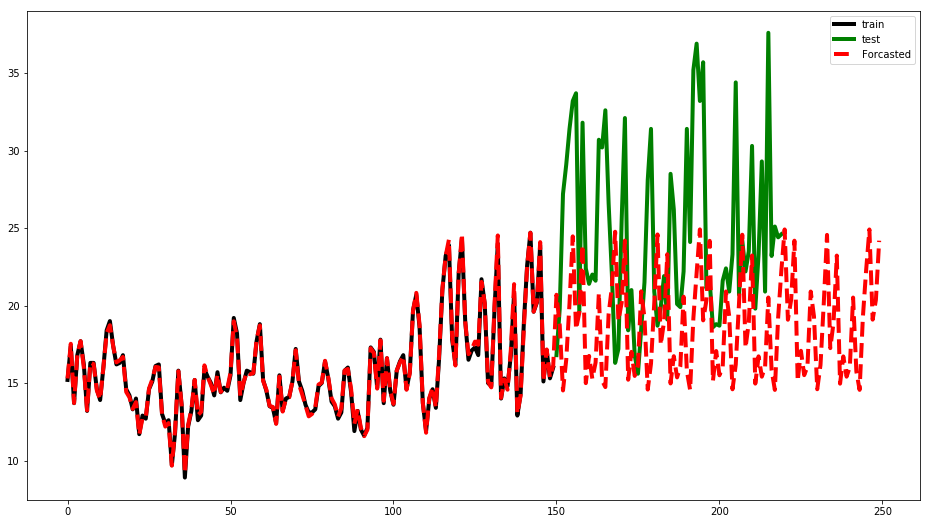

In [20]:
plt.figure(figsize=(16,9))
plt.plot(Ytrain , 'black', linewidth=4)
plt.plot([None for i in Ytrain] + [x for x in Ytest], 'green', linewidth=4)
plt.plot(forcasted_output,'r--' , linewidth=4)
plt.legend(('train','test','Forcasted'))
plt.show()

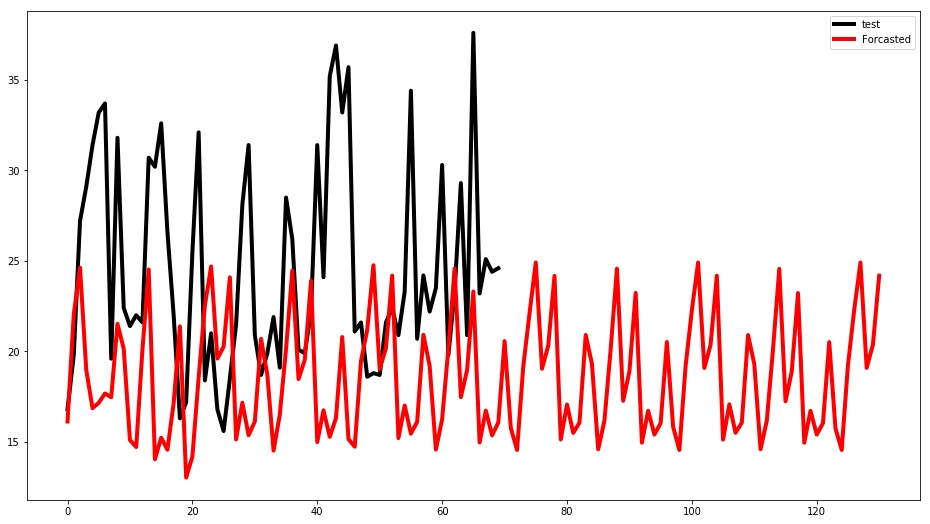

In [19]:
plt.figure(figsize=(16,9))
plt.plot(Ytest , 'black', linewidth=4)
plt.plot(forcasted_output[119:],'r' , linewidth=4)
plt.legend(('test','Forcasted'))
plt.show()